# Making plots for the paper, in the corresponding order.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# import starspot as ss

plotpar = {'axes.labelsize': 30,
           'font.size': 22,
           'legend.fontsize': 10,
           'xtick.labelsize': 30,
           'ytick.labelsize': 30,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the data file.

In [3]:
df0 = pd.read_csv("../kepler_kinematics/gaia_kepler_lamost.csv")

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,20,21,22,28,30,54,55,56,74,76,155,156,176) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(len(df0))
f = np.isfinite(df0.color_teffs.values) & (df0.color_teffs.values > 2000) & (df0.color_teffs.values < 10000)
df = df0.iloc[f]
print("removing stars with weird teffs")
print(len(df))

178000
removing stars with weird teffs
177026


# Distributions of stars with and without RVs.

Make the plot of RV histograms.

In [5]:
m = np.isfinite(df.rv.values)

minimum teff star with RV =  2392.745473104922
0.4224986601224225 of stars cooler than 5000 K have RVs
0.279300723997881 of stars hotter than 5000 K have RVs
faintest star with RV =  17.582468032836914
Median mag of stars with RVs = 13.00484323501587
Median mag of stars without RVs = 15.053181648254395
2414 stars with RVs fainter than 15th


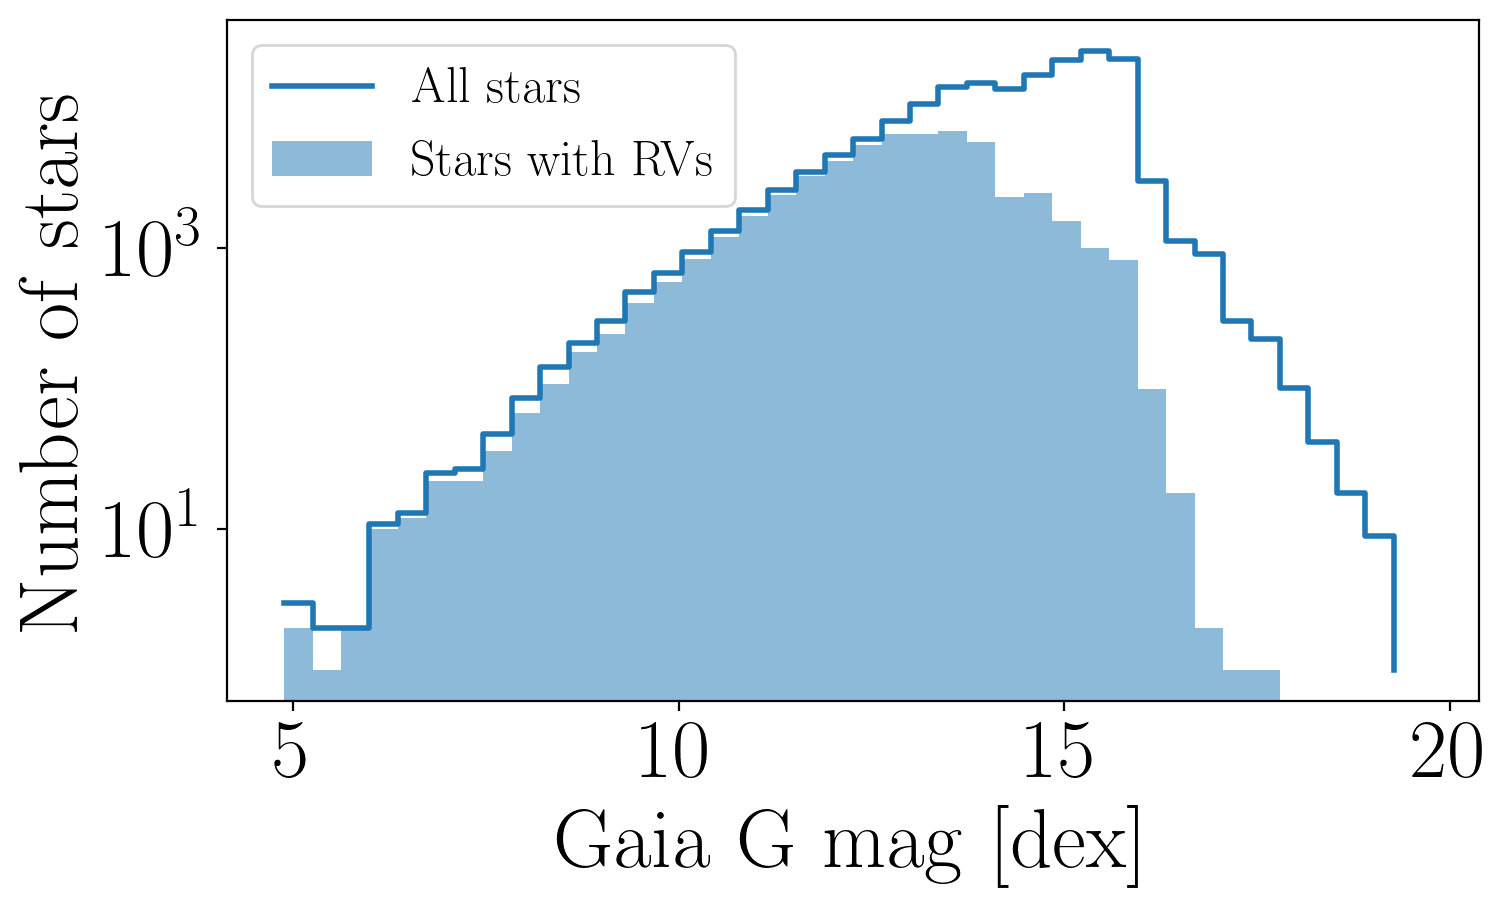

In [7]:
# fig = plt.figure(figsize=(16, 12), dpi=200)
fig = plt.figure(figsize=(8, 5), dpi=200)

# ax1 = fig.add_subplot(221)
ax1 = fig.add_subplot(111)
n, bins = np.histogram(df.phot_g_mean_mag, 40)
ax1.step(bins[:-1], n, color="C0", lw="2", where="post", label="$\mathrm{All~stars}$");
ax1.hist(df.phot_g_mean_mag.values[m], bins=bins, color="C0", alpha=.5,
         label="$\mathrm{Stars~with~RVs}$", rasterized=True);
n, bins = np.histogram(df.phot_g_mean_mag.values, bins=bins)
ax1.set_xlabel("$\mathrm{Gaia~G~mag~[dex]}$");
ax1.set_ylabel("$\mathrm{Number~of~stars}$")
ax1.set_yscale("log")
ax1.legend(loc="upper left", fontsize=18);

# ax2 = fig.add_subplot(222)
# n, bins = np.histogram(df.color_teffs, 80)
# ax2.step(bins[:-1], n, color="C0", lw="2", where="post", label="$\mathrm{All~stars}$");
# n, bins, _ = ax2.hist(df.color_teffs.values[m], bins=bins, color="C0", alpha=.5, label="$\mathrm{Stars~with~RVs}$", rasterized=True);
# n, bins = np.histogram(df.color_teffs.values, bins=bins)
# ax2.set_xlabel("$\mathrm{T_{eff}~[K]}$");
# ax2.set_yscale("log")
# ax2.set_yticklabels([])

# ax3 = fig.add_subplot(223)
# n, bins = np.histogram(np.log10(df.r_est), 40)
# ax3.step(bins[:-1], n, color="C0", lw="2", where="post", label="$\mathrm{All~stars}$");
# ax3.hist(np.log10(df.r_est.values)[m], bins=bins, color="C0", alpha=.5, label="$\mathrm{Stars~with~RVs}$", rasterized=True);
# n, bins = np.histogram(df.r_est.values, bins=bins)
# ax3.set_xlabel("$\mathrm{\log_{10}(Distance/pc)}$");
# ax3.set_ylabel("$\mathrm{Number~of~stars}$")
# ax3.set_yscale("log")
# # ax3.legend(loc="upper left", fontsize=20);

# ax4 = fig.add_subplot(224)
# n, bins = np.histogram(df.logg, 80)
# ax4.step(bins[:-1], n, color="C0", lw="2", where="post", label="$\mathrm{All~stars}$");
# n, bins, _ = ax4.hist(df.logg.values[m], bins=bins, color="C0", alpha=.5, label="$\mathrm{Stars~with~RVs}$", rasterized=True);
# n, bins = np.histogram(df.logg.values, bins=bins)
# ax4.set_xlabel("$\mathrm{log(g)}$");
# ax4.set_yscale("log")
# ax4.set_yticklabels([])

# plt.subplots_adjust(wspace=.0, hspace=.3, bottom=.2)
plt.tight_layout()
plt.savefig("../plots/rv_histogram")
plt.savefig("../paper/rv_histogram.pdf")

print("minimum teff star with RV = ", min(df.color_teffs.values[m]))
print(sum(df.color_teffs.values[m] < 5000)/sum(df.color_teffs.values < 5000), "of stars cooler than 5000 K have RVs")
print(sum(df.color_teffs.values[m] > 5000)/sum(df.color_teffs.values > 5000), "of stars hotter than 5000 K have RVs")

print("faintest star with RV = ", max(df.phot_g_mean_mag.values[m]))
print(f"Median mag of stars with RVs = {np.median(df.phot_g_mean_mag.values[m])}")
print(f"Median mag of stars without RVs = {np.median(df.phot_g_mean_mag.values[~m])}")
print(sum(df.phot_g_mean_mag.values[m] > np.median(df.phot_g_mean_mag.values[~m])), "stars with RVs fainter than 15th")

In [ ]:
def abs_mag(m, D):
    return 5 + m - 5*np.log10(D)

M_G = abs_mag(df.phot_g_mean_mag.values, df.r_est.values)

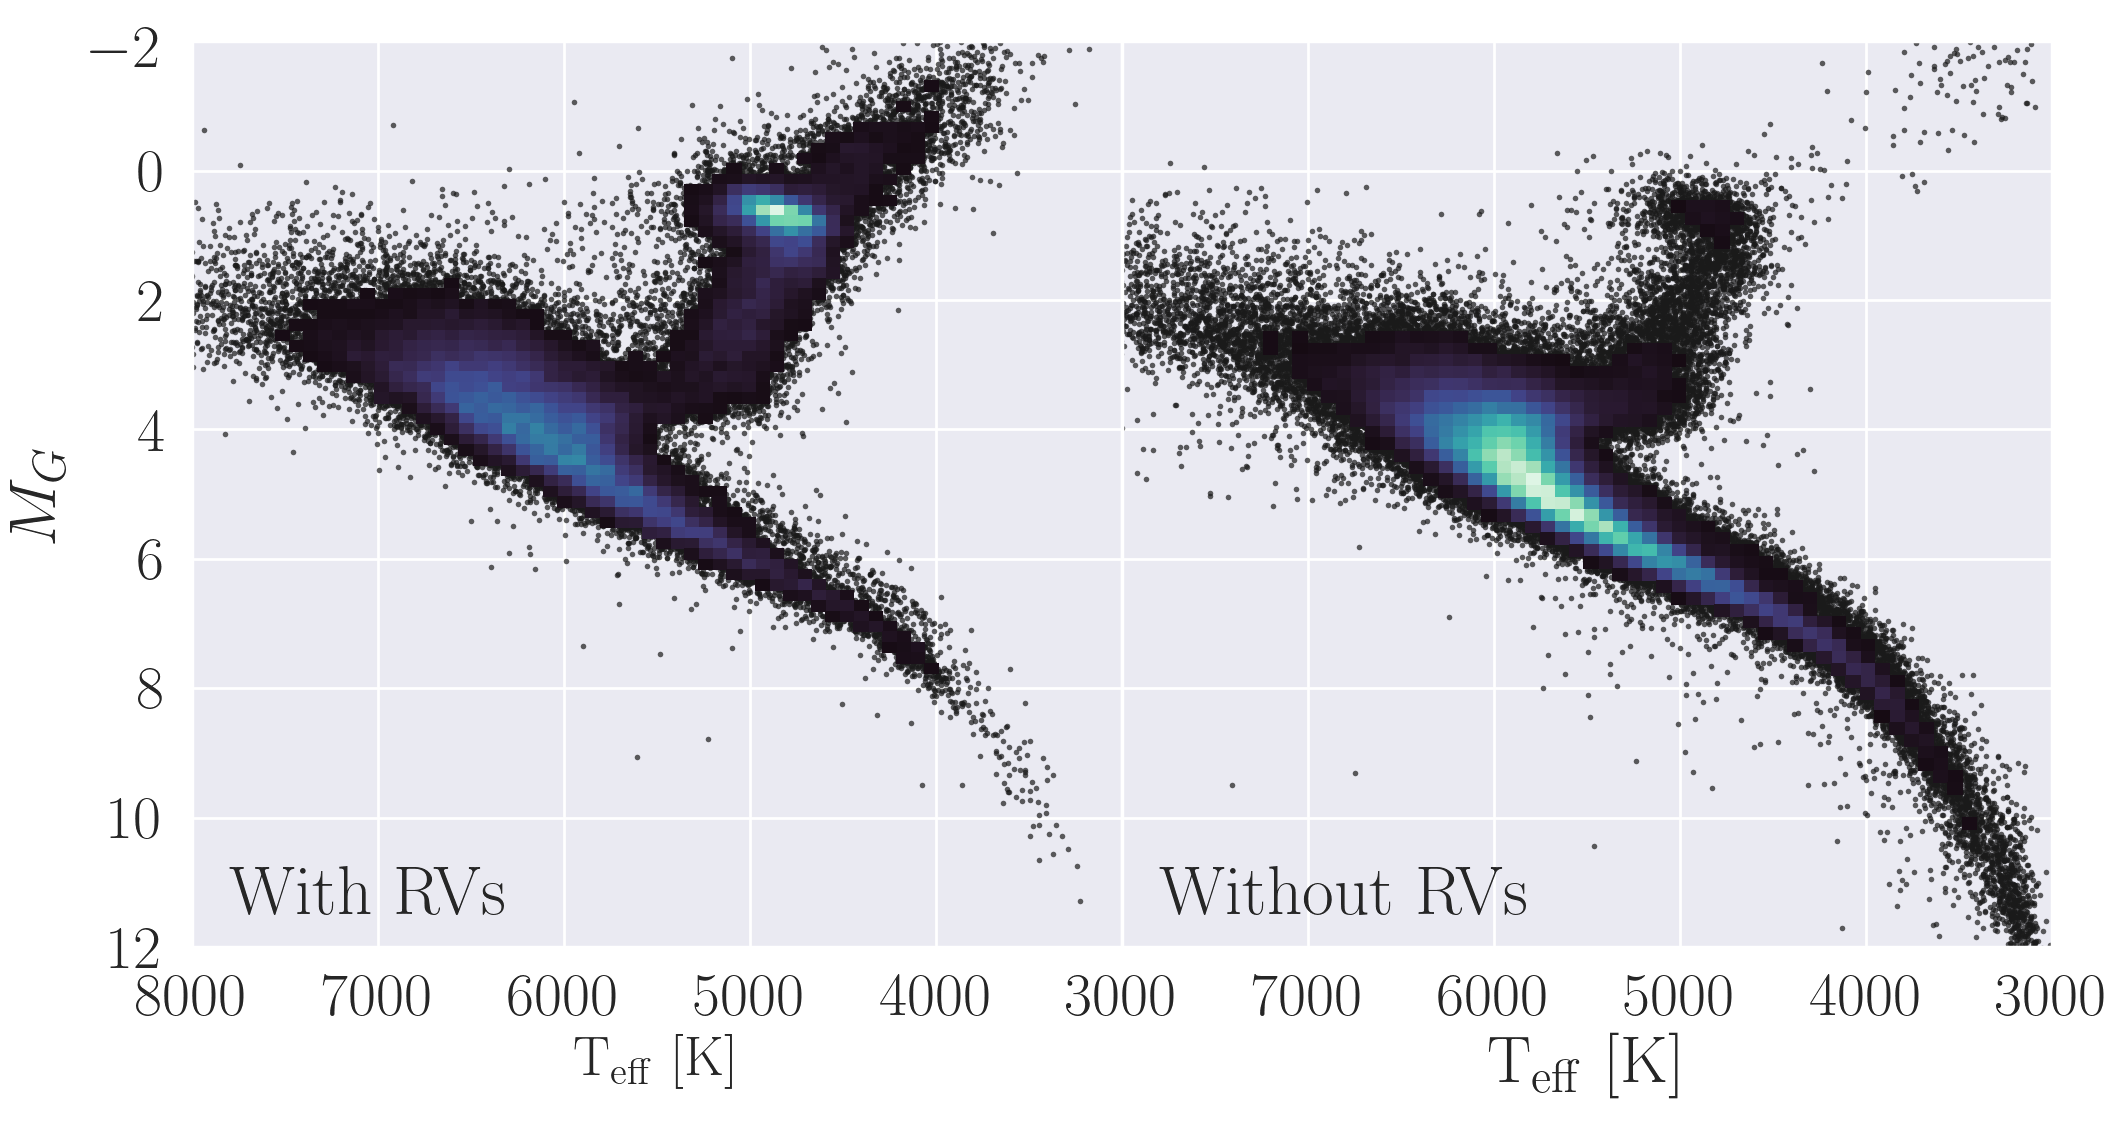

In [68]:
import seaborn as sns

fig = plt.figure(figsize=(12, 6), dpi=200)
ax0 = fig.add_subplot(121)
# sns.scatterplot(x=df.color_teffs.values[m], y=M_G[m], s=5, color=".15")
ax0.plot(df.color_teffs.values[m], M_G[m], "k.", ms=4, mec="none", zorder=1, alpha=.7, rasterized=True)
sns.histplot(x=df.color_teffs.values[m], y=M_G[m], bins=100, pthresh=.1,
             cmap="mako", zorder=2)
# sns.kdeplot(x=df.color_teffs.values[m][::10], y=M_G[m][::10], levels=8,
#             color=".6", linewidths=1)
ax0.text(7800, 11.5, "$\mathrm{With~RVs}$", fontsize=25)
ax0.set_xlim(8000, 3000)
ax0.set_ylim(12, -2)
ax0.set_ylabel("$M_G$")#, fontsize=20)
ax0.set_xlabel("$\mathrm{T_{eff}~[K]}$", fontsize=20)
sns.set(font_scale = 2)

ax1 = fig.add_subplot(122)
# sns.scatterplot(x=df.color_teffs.values[~m], y=M_G[~m], s=5, color=".15")
ax1.plot(df.color_teffs.values[~m], M_G[~m], "k.", ms=4, mec="none", zorder=1, alpha=.7, rasterized=True)
sns.histplot(x=df.color_teffs.values[~m], y=M_G[~m], bins=100, pthresh=.1,
             cmap="mako", zorder=2)
# sns.kdeplot(x=df.color_teffs.values[~m][::10], y=M_G[~m][::10], levels=8,
#             color=".6", linewidths=1)
ax1.set_xlim(8000, 3000)
ax1.set_ylim(12, -2)
ax1.set_yticklabels([])
ax1.set_xticklabels(["$3000$", "$4000$", "$5000$", "$6000$", "$7000$"])
ax1.set_xlabel("$\mathrm{T_{eff}~[K]}$")#, fontsize=20)
ax1.text(7800, 11.5, "$\mathrm{Without~RVs}$", fontsize=25)
sns.set(font_scale = 2)

plt.subplots_adjust(wspace=0.)

plt.savefig("../plots/CMD")
plt.savefig("../paper/CMD.pdf")

# The Orientation of the Kepler field.

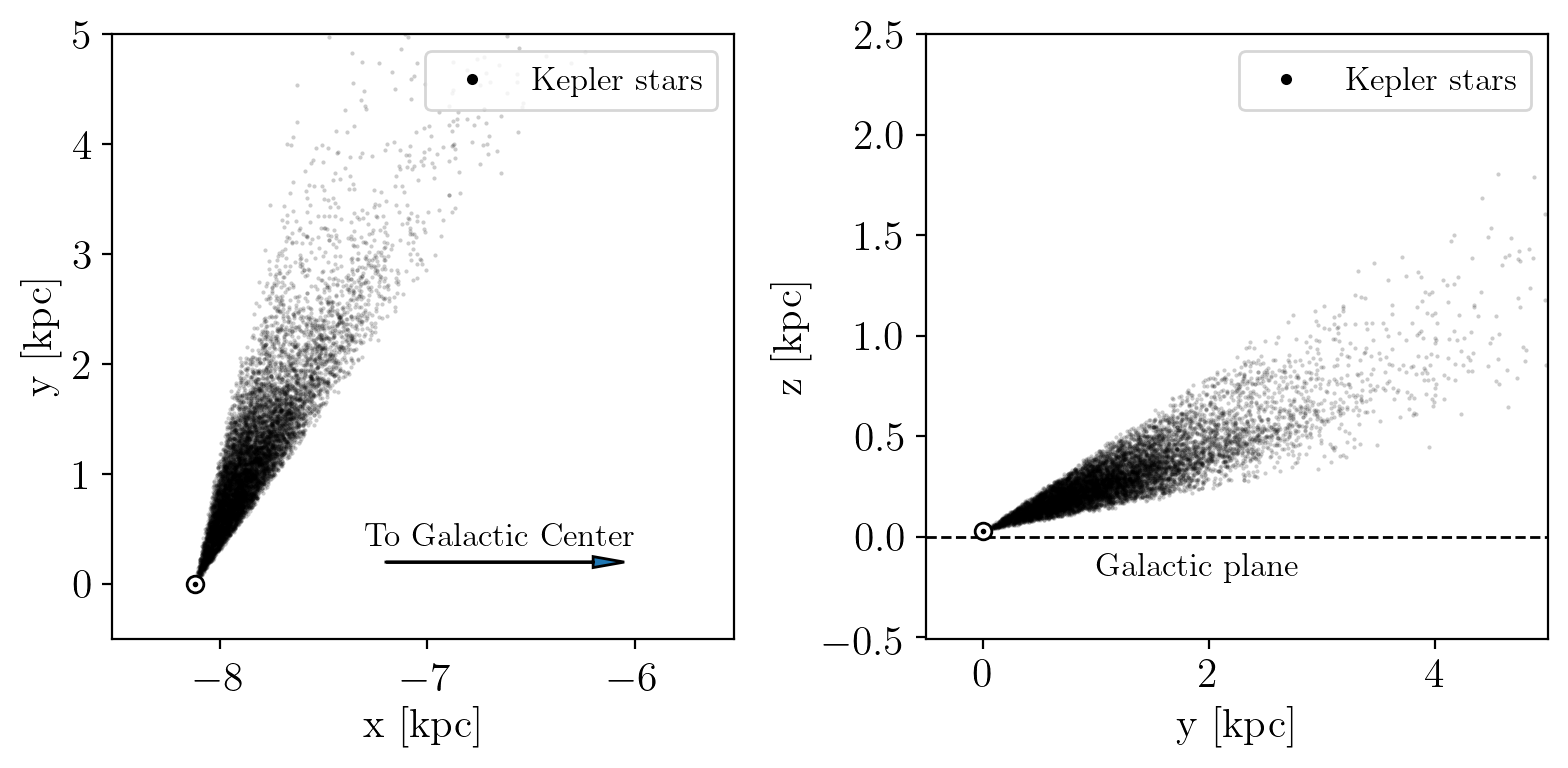

In [15]:
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord

plotpar = {'axes.labelsize': 30,
                  'font.size': 12,
                  'legend.fontsize': 15,
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                  'text.usetex': True}
plt.rcParams.update(plotpar)

np.random.seed(42)
rand_inds = np.arange(len(df))
random.shuffle(rand_inds)

# Solar coords
sun_xyz = [-8.122, 0, 0] * u.kpc
sun_vxyz = [12.9, 245.6, 7.78] * u.km/u.s

galcen_frame = coord.Galactocentric(galcen_distance=np.abs(sun_xyz[0]),
                                    galcen_v_sun=sun_vxyz,
                                    z_sun=27*u.pc)

x, y, z = [], [], []
for i in rand_inds[:10000]:
    c = coord.SkyCoord(ra = df.ra.values[i] * u.deg,
                       dec = df.dec.values[i] * u.deg,
                       distance = (1./df.parallax.values[i]) * u.kpc)
    galcen = c.transform_to(galcen_frame)
    
    xyz = galcen.data.xyz
    x.append(xyz[0].value)
    y.append(xyz[1].value)
    z.append(xyz[2].value)
    
fig = plt.figure(figsize=(8, 4), dpi=200)

ax1 = fig.add_subplot(121)
ax1.plot(x, y, "k.", alpha=.2, mec="none", ms=3, rasterized=True, label="$\mathrm{Kepler~stars}$")
legend = ax1.legend(loc="upper right", fontsize=12)
legend.legendHandles[0]._legmarker.set_markersize(8)
legend.legendHandles[0]._legmarker.set_alpha(1)

ax1.arrow(-7.2, .2, 1, 0, head_width=.1)
ax1.text(-7.3, .35, "$\mathrm{To~Galactic~Center}$")
ax1.plot(-8.122, 0, "wo", mec="k", ms=6)
ax1.plot(-8.122, 0, "k.", ms=2)
ax1.set_xlim(-8.52, -5.52)
ax1.set_ylim(-.5, 5)
ax1.set_xlabel("$\mathrm{x~[kpc]}$", fontsize=15)
ax1.set_ylabel("$\mathrm{y~[kpc]}$", fontsize=15)

ax2 = fig.add_subplot(122)
ax2.plot(y, z, "k.", alpha=.2, mec="none", ms=3, rasterized=True, label="$\mathrm{Kepler~stars}$")
legend = ax2.legend(fontsize=12)
legend.legendHandles[0]._legmarker.set_markersize(8)
legend.legendHandles[0]._legmarker.set_alpha(1)
ax2.plot(0, 27e-3, "wo", mec="k", ms=6)
ax2.plot(0, 27e-3, "k.", ms=2)
ax2.set_ylim(-.51, 2.5)
ax2.axhline(0, color="k", ls="--", lw=1, zorder=0)
ax2.text(1, -.2, "$\mathrm{Galactic~plane}$")
ax2.set_xlim(-.5, 5)
ax2.set_xlabel("$\mathrm{y~[kpc]}$", fontsize=15)
ax2.set_ylabel("$\mathrm{z~[kpc]}$", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/kepler_field")
plt.savefig("../paper/kepler_field.pdf")

# Examining sensitivity to the prior.

In [16]:
# def mean_and_var(vx, vy, vz, lnD):
#     V = np.stack((vx, vy, vz, lnD), axis=0)
#     return np.mean(V, axis=1), np.cov(V)

# lnD = np.log(1./df.parallax)
# finite = np.isfinite(df.vx.values) & np.isfinite(df.vy.values) \
#     & np.isfinite(df.vz.values) & np.isfinite(lnD)

# nsigma = 3
# mx = ss.sigma_clip(df.vx.values[finite], nsigma=nsigma)
# my = ss.sigma_clip(df.vy.values[finite], nsigma=nsigma)
# mz = ss.sigma_clip(df.vz.values[finite], nsigma=nsigma)
# md = ss.sigma_clip(lnD[finite], nsigma=nsigma)
# m = mx & my & mz & md

# mu, cov = mean_and_var(df.vx.values[finite][m],
#                        df.vy.values[finite][m],
#                        df.vz.values[finite][m],
#                        lnD[finite][m])

import kepler_kinematics as kek
mu, cov = kek.get_prior()
print(np.shape(cov))

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (1,2,3,20,21,22,28,30,54,55,56,74,76,155,156,176) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(4, 4)


In [17]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse_mod(x, y, cov, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

#     cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

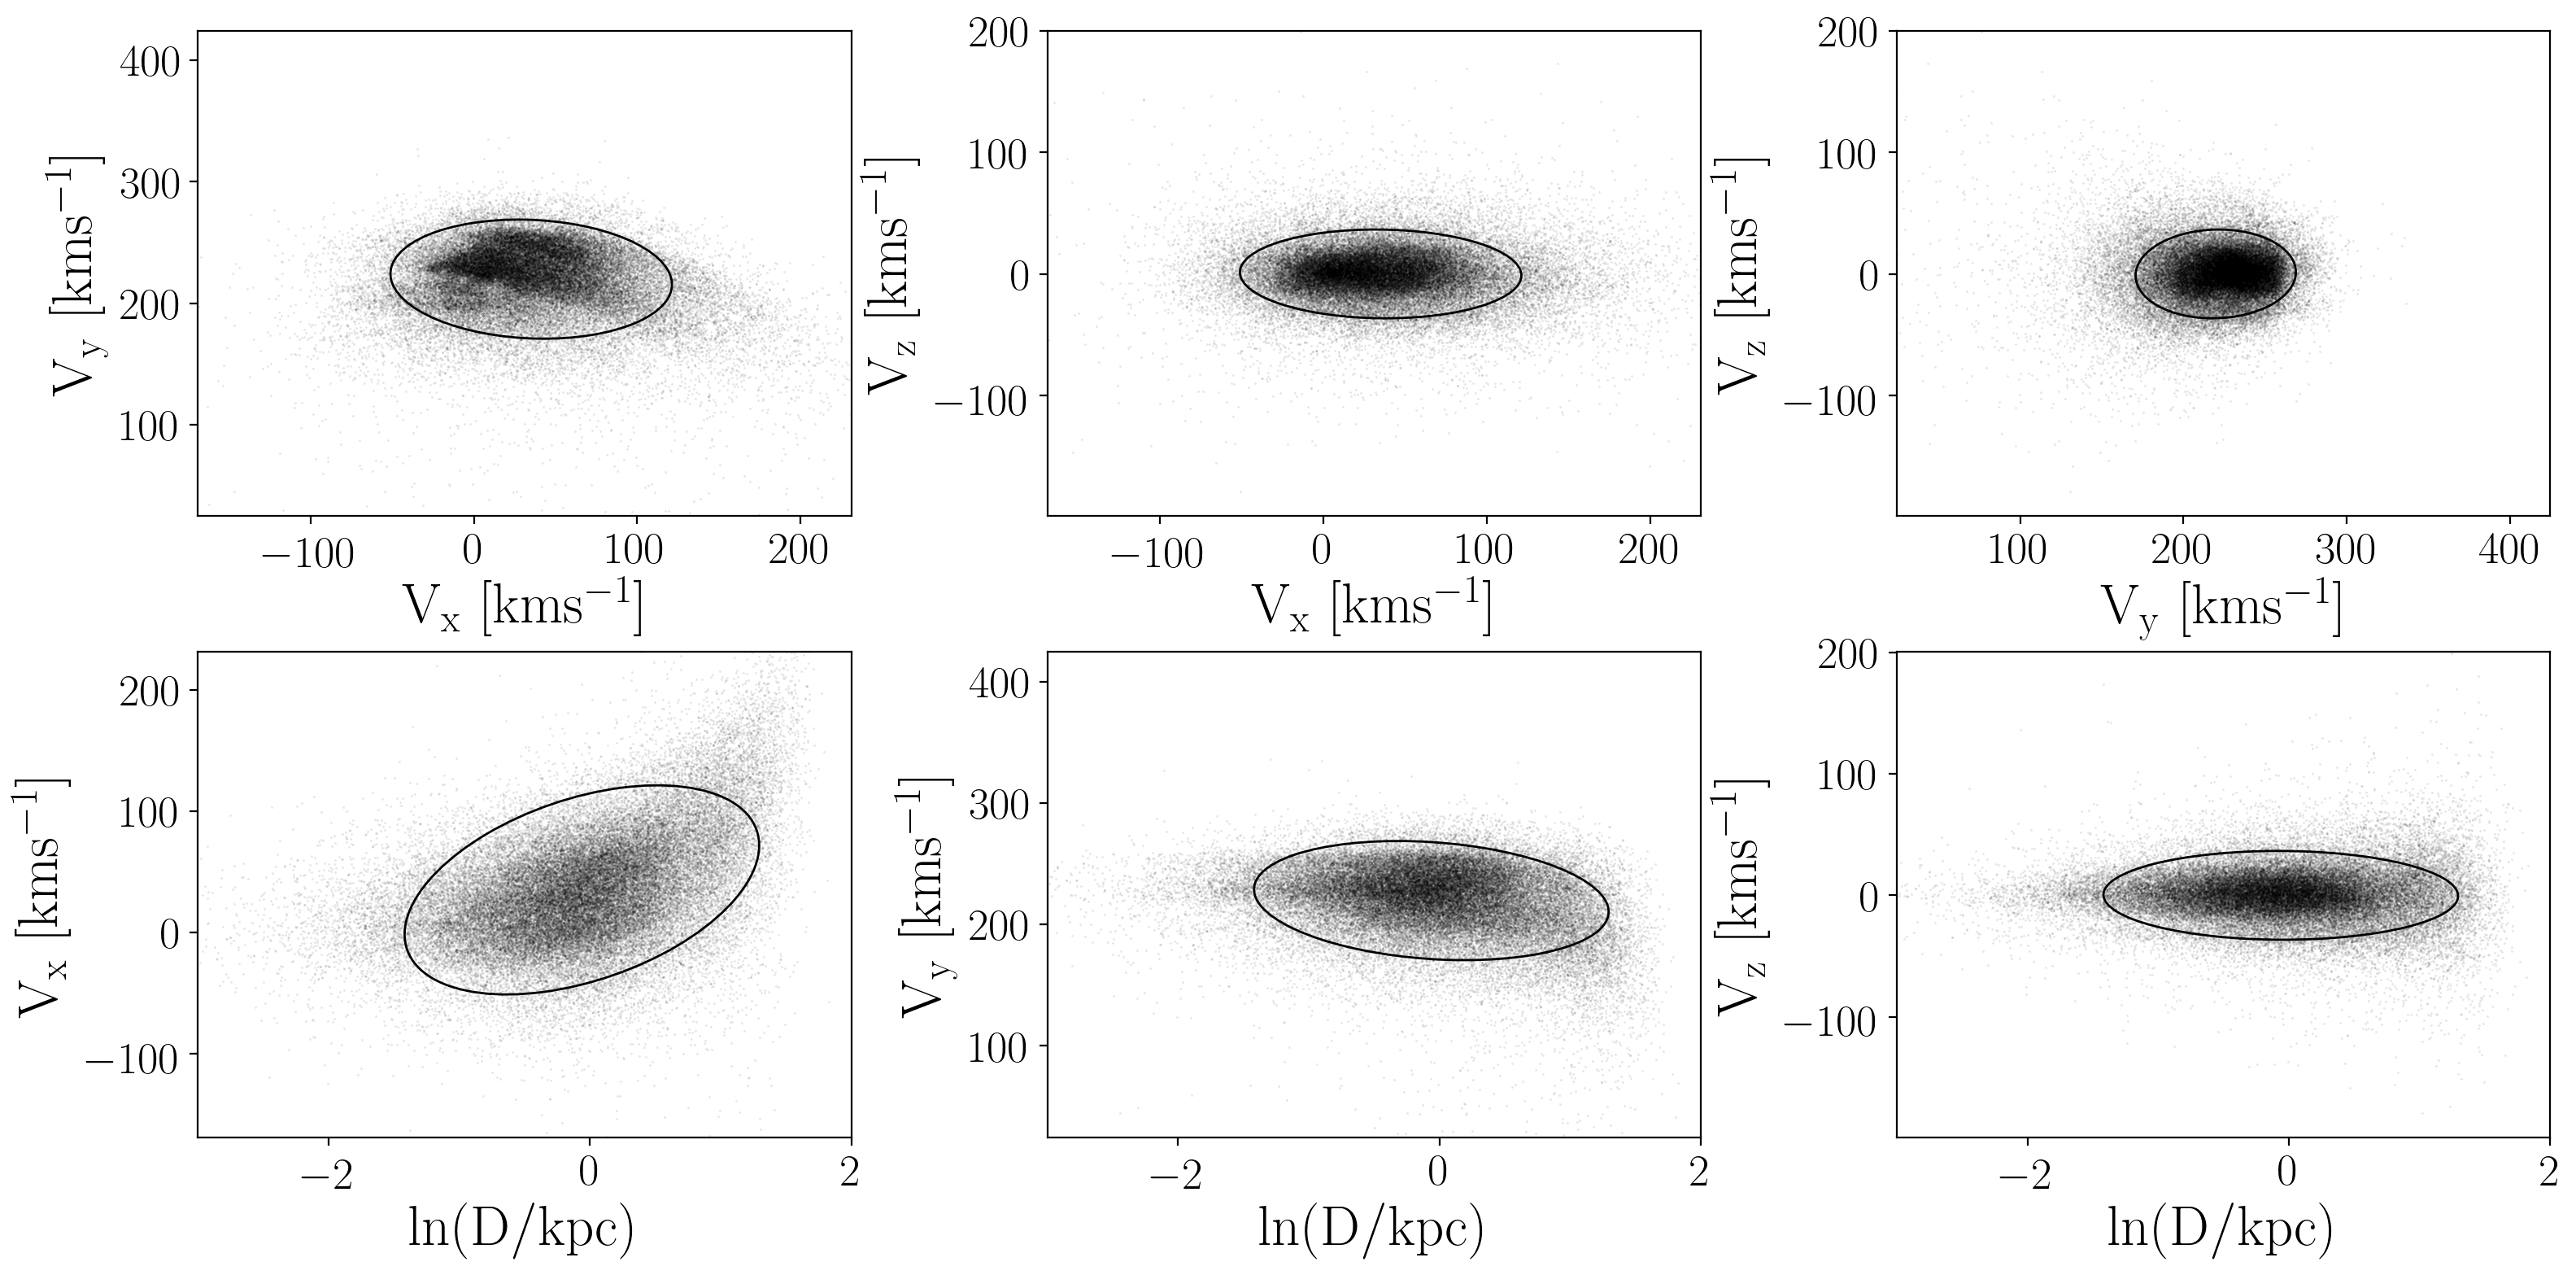

In [20]:
box = 200
lnD = np.log(df.r_est.values * 1e-3)
m = np.isfinite(df.vx.values) & np.isfinite(df.vy.values) & np.isfinite(df.vz.values) & np.isfinite(lnD)
vx_c, vy_c, vz_c, lnD_c = df.vx.values[m], df.vy.values[m], df.vz.values[m], lnD[m]
medx, medy, medz = np.median(vx_c), np.median(vy_c), np.median(vz_c)
xlim, ylim, zlim, dlim = (medx-box, medx+box), (medy-box, medy+box), (medz-box, medz+box), (-3, 2)

alpha, ms = .1, 2
color = "k"
cmap = "viridis_r"
vmin, vmax = 0, .1

fig = plt.figure(figsize=(16, 8), dpi=200)
ax0 = fig.add_subplot(231)
ax0.plot(vx_c, vy_c, "k.", ms=ms, alpha=alpha, mec="none", rasterized=True, zorder=0)
_cov = np.array([[cov[0, 0], cov[0, 1]], [cov[1, 0], cov[1, 1]]])
confidence_ellipse_mod(vx_c, vy_c, _cov, ax0, n_std=2, edgecolor=color, zorder=1)
ax0.set_xlim(xlim)
ax0.set_ylim(ylim)
ax0.set_xlabel("$\mathrm{V_x~[kms^{-1}]}$")
ax0.set_ylabel("$\mathrm{V_y~[kms^{-1}]}$")

ax1 = fig.add_subplot(232)
ax1.plot(vx_c, vz_c, "k.", ms=ms, alpha=alpha, mec="none", rasterized=True, zorder=0)
_cov = np.array([[cov[0, 0], cov[0, 2]], [cov[2, 0], cov[2, 2]]])
confidence_ellipse_mod(vx_c, vz_c, _cov, ax1, n_std=2, edgecolor=color, zorder=1)
ax1.set_xlim(xlim)
ax1.set_ylim(zlim)
ax1.set_xlabel("$\mathrm{V_x~[kms^{-1}]}$")
ax1.set_ylabel("$\mathrm{V_z~[kms^{-1}]}$")

ax2 = fig.add_subplot(233)
ax2.plot(vy_c, vz_c, "k.", ms=ms, alpha=alpha, mec="none", rasterized=True, zorder=0)
_cov = np.array([[cov[1, 1], cov[1, 2]], [cov[2, 1], cov[2, 2]]])
confidence_ellipse_mod(vy_c, vz_c, _cov, ax2, n_std=2, edgecolor=color, zorder=1) 
ax2.set_xlim(ylim)
ax2.set_ylim(zlim)
ax2.set_xlabel("$\mathrm{V_y~[kms^{-1}]}$")
ax2.set_ylabel("$\mathrm{V_z~[kms^{-1}]}$")

ax3 = fig.add_subplot(234)
ax3.plot(lnD_c, vx_c, "k.", ms=ms, alpha=alpha, mec="none", rasterized=True, zorder=0)
_cov = np.array([[cov[3, 3], cov[3, 0]], [cov[0, 3], cov[0, 0]]])
confidence_ellipse_mod(lnD_c, vx_c, _cov, ax3, n_std=2, edgecolor=color, zorder=1)
ax3.set_ylabel("$\mathrm{V_x~[kms^{-1}]}$")
ax3.set_xlabel("$\mathrm{\ln(D/kpc)}$")
ax3.set_xlim(dlim)
ax3.set_ylim(xlim)

ax4 = fig.add_subplot(235)
ax4.plot(lnD_c, vy_c, "k.", ms=ms, alpha=alpha, mec="none", rasterized=True, zorder=0)
_cov = np.array([[cov[3, 3], cov[3, 1]], [cov[1, 3], cov[1, 1]]])
confidence_ellipse_mod(lnD_c, vy_c, _cov, ax4, n_std=2, edgecolor=color, zorder=1)
ax4.set_ylabel("$\mathrm{V_y~[kms^{-1}]}$")
ax4.set_xlabel("$\mathrm{\ln(D/kpc)}$")
ax4.set_xlim(dlim)
ax4.set_ylim(ylim)

ax5 = fig.add_subplot(236)
ax5.plot(lnD_c, vz_c, "k.", ms=ms, alpha=alpha, mec="none", rasterized=True, zorder=0)
_cov = np.array([[cov[3, 3], cov[3, 2]], [cov[2, 3], cov[2, 2]]])
confidence_ellipse_mod(lnD_c, vz_c, _cov, ax5, n_std=2, edgecolor=color, zorder=1)
ax5.set_ylabel("$\mathrm{V_z~[kms^{-1}]}$")
ax5.set_xlabel("$\mathrm{\ln(D/kpc)}$")
ax5.set_xlim(dlim)
ax5.set_ylim(zlim)

plt.tight_layout()
plt.subplots_adjust(hspace=.28, wspace=.3)
plt.savefig("../plots/prior_distributions_2D")
plt.savefig("../paper/prior_distributions_2D.pdf")

In [56]:
results = pd.read_csv("../data/all_kepler.csv")
rdf = pd.merge(results, df0, on="kepid", how="left")
print(np.shape(rdf))
rdf = rdf.iloc[np.isfinite(rdf.rv.values)]
results.keys(), np.shape(rdf)

(1044, 368)


(Index(['Unnamed: 0', 'Unnamed: 0.1', 'kepid', 'vx_inferred',
        'vx_inferred_errp', 'vx_inferred_errm', 'vx_inferred_err',
        'vy_inferred', 'vy_inferred_errp', 'vy_inferred_errm',
        'vy_inferred_err', 'vz_inferred', 'vz_inferred_errp',
        'vz_inferred_errm', 'vz_inferred_err', 'lndistance_inferred',
        'lndistance_inferred_errp', 'lndistance_inferred_errm',
        'lndistance_inferred_err'],
       dtype='object'),
 (484, 368))

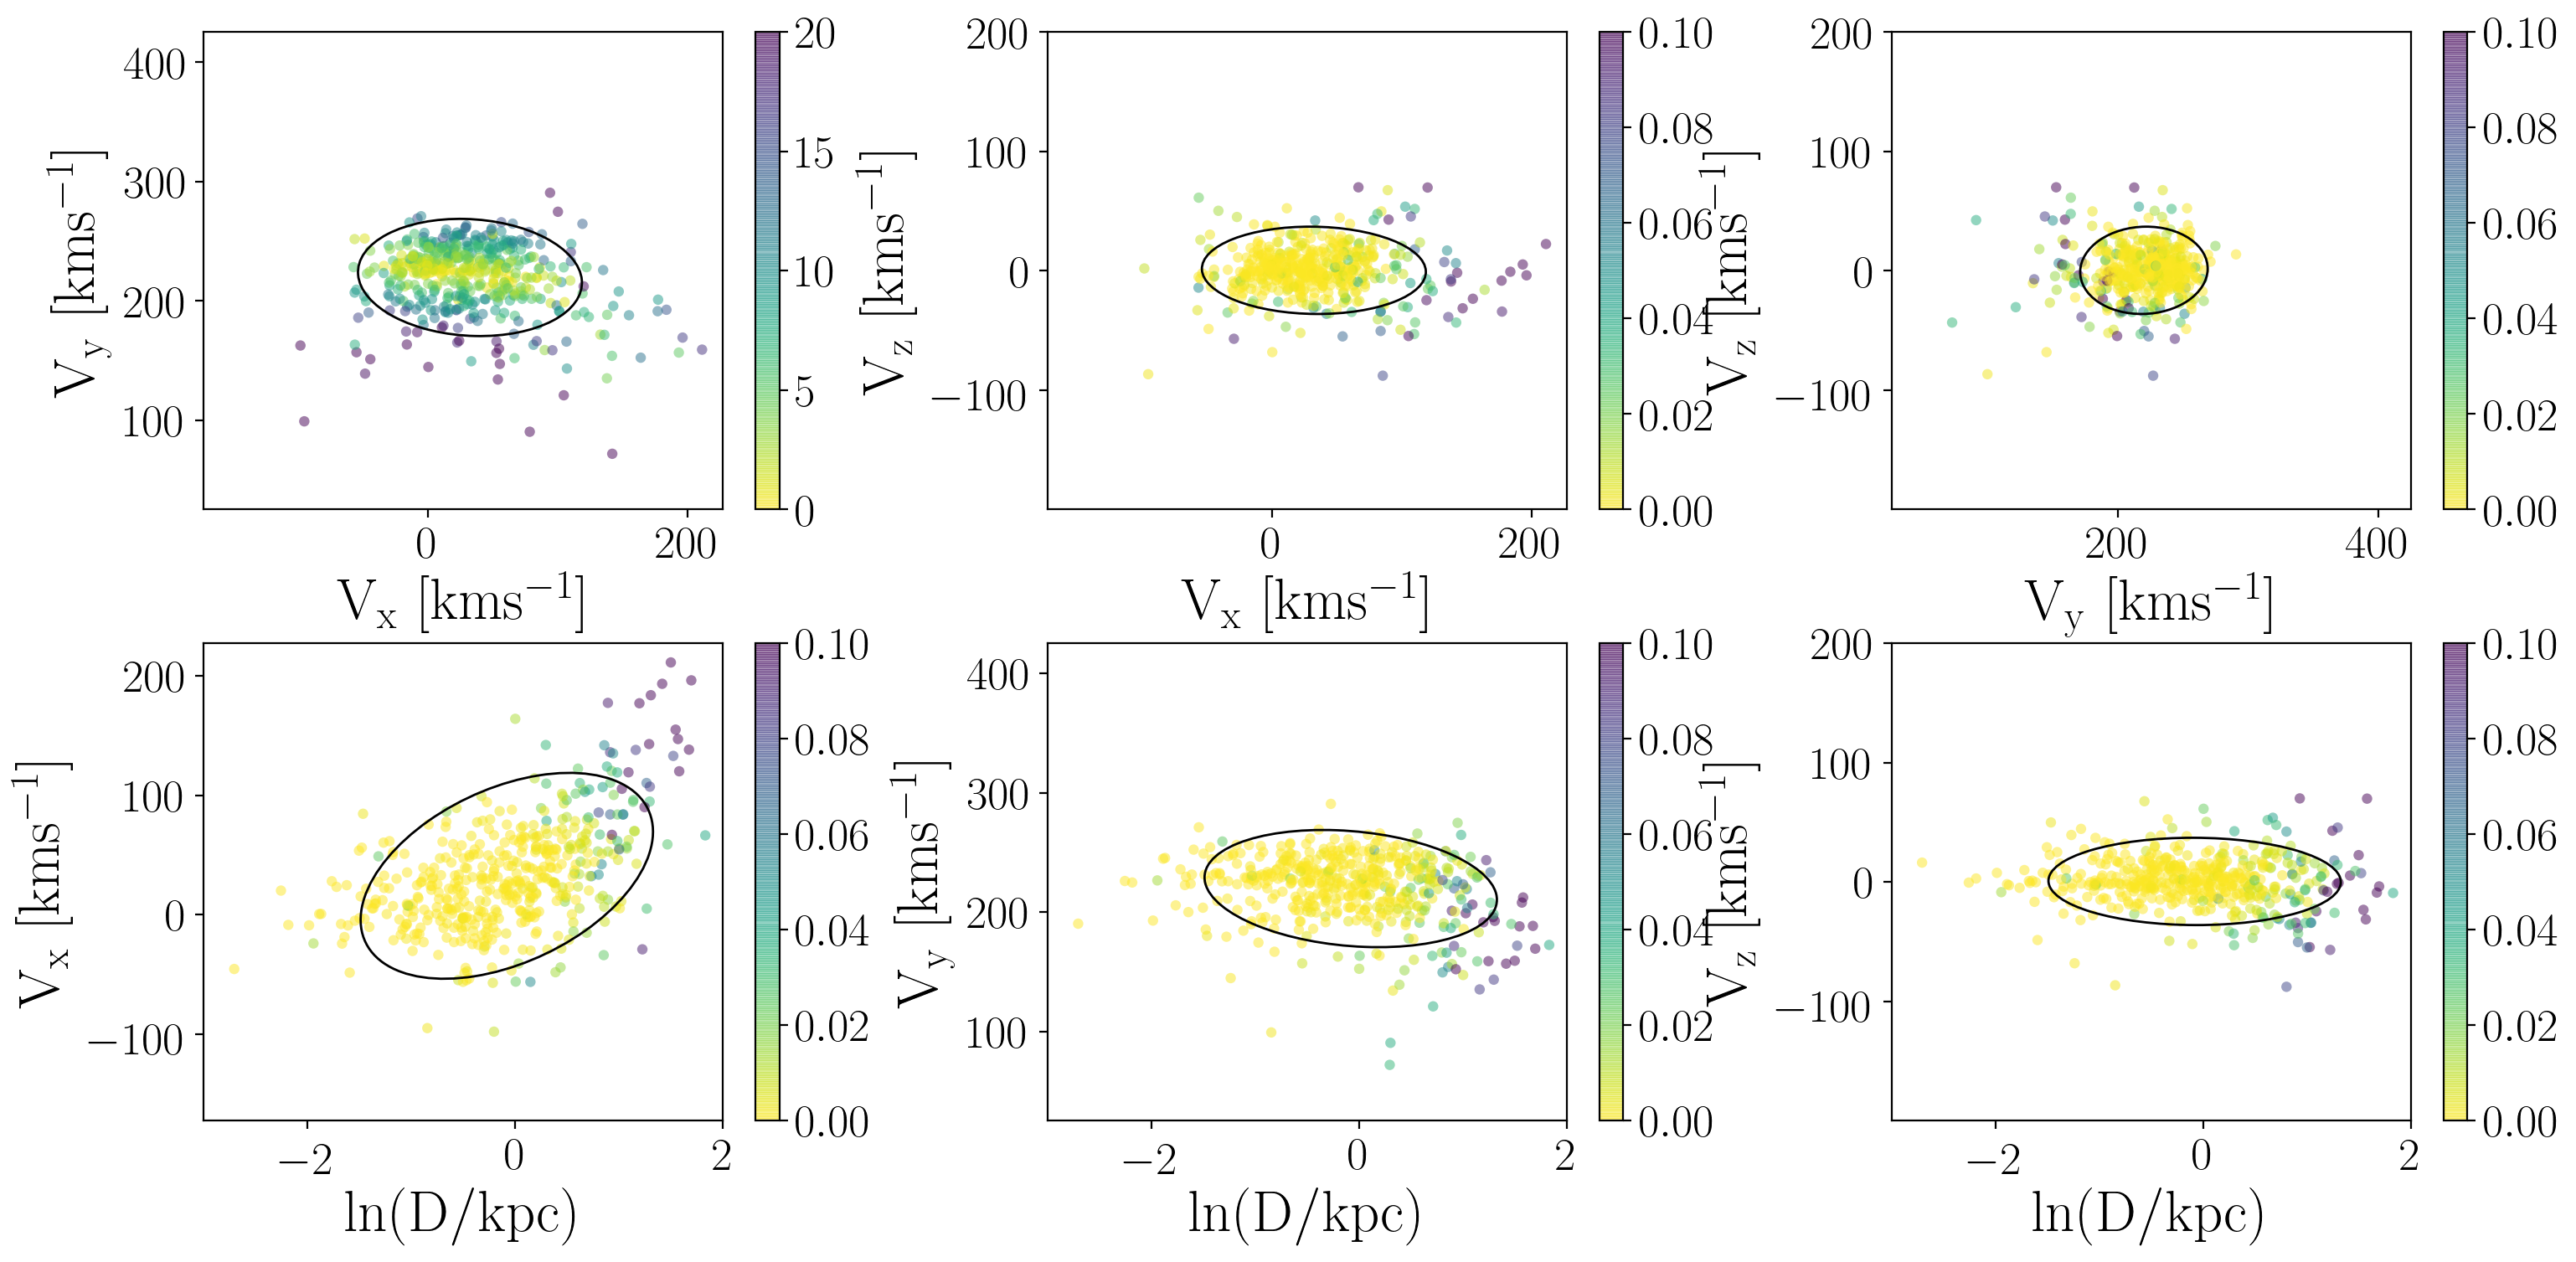

In [61]:
box = 200
lnD = np.log(1./rdf.parallax.values)
# lnD = np.log(rdf.r_est.values * 1e-3)
m = np.isfinite(rdf.vx.values) & np.isfinite(rdf.vy.values) & np.isfinite(rdf.vz.values) & np.isfinite(lnD)
vx_c, vy_c, vz_c, lnD_c = rdf.vx.values[m], rdf.vy.values[m], rdf.vz.values[m], lnD[m]
medx, medy, medz = np.median(vx_c), np.median(vy_c), np.median(vz_c)
xlim, ylim, zlim, dlim = (medx-box, medx+box), (medy-box, medy+box), (medz-box, medz+box), (-3, 2)

vxresid = abs(vx_c - rdf.vx_inferred.values[m])
vyresid = abs(vy_c - rdf.vy_inferred.values[m])
vzresid = abs(vz_c - rdf.vz_inferred.values[m])
dresid = abs(lnD_c - rdf.lndistance_inferred.values[m])

alpha, ms = .5, 20
color = "k"
cmap = "viridis_r"
vmin, vmax = 0, .1

fig = plt.figure(figsize=(16, 8), dpi=200)
ax0 = fig.add_subplot(231)
cb = ax0.scatter(vx_c, vy_c, c=vxresid, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, cmap=cmap, vmin=vmin, vmax=20)
_cov = np.array([[cov[0, 0], cov[0, 1]], [cov[1, 0], cov[1, 1]]])
confidence_ellipse_mod(vx_c, vy_c, _cov, ax0, n_std=2, edgecolor=color, zorder=1)
ax0.set_xlim(xlim)
ax0.set_ylim(ylim)
ax0.set_xlabel("$\mathrm{V_x~[kms^{-1}]}$")
ax0.set_ylabel("$\mathrm{V_y~[kms^{-1}]}$")
plt.colorbar(cb)

ax1 = fig.add_subplot(232)
cb = ax1.scatter(vx_c, vz_c, c=dresid, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, cmap=cmap, vmin=vmin, vmax=vmax)
_cov = np.array([[cov[0, 0], cov[0, 2]], [cov[2, 0], cov[2, 2]]])
confidence_ellipse_mod(vx_c, vz_c, _cov, ax1, n_std=2, edgecolor=color, zorder=1)
ax1.set_xlim(xlim)
ax1.set_ylim(zlim)
ax1.set_xlabel("$\mathrm{V_x~[kms^{-1}]}$")
ax1.set_ylabel("$\mathrm{V_z~[kms^{-1}]}$")
plt.colorbar(cb)

ax2 = fig.add_subplot(233)
cb = ax2.scatter(vy_c, vz_c, c=dresid, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, cmap=cmap, vmin=vmin, vmax=vmax)
_cov = np.array([[cov[1, 1], cov[1, 2]], [cov[2, 1], cov[2, 2]]])
confidence_ellipse_mod(vy_c, vz_c, _cov, ax2, n_std=2, edgecolor=color, zorder=1) 
ax2.set_xlim(ylim)
ax2.set_ylim(zlim)
ax2.set_xlabel("$\mathrm{V_y~[kms^{-1}]}$")
ax2.set_ylabel("$\mathrm{V_z~[kms^{-1}]}$")
plt.colorbar(cb)

ax3 = fig.add_subplot(234)
cb = ax3.scatter(lnD_c, vx_c, c=dresid, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, cmap=cmap, vmin=0, vmax=.1)
_cov = np.array([[cov[3, 3], cov[3, 0]], [cov[0, 3], cov[0, 0]]])
confidence_ellipse_mod(lnD_c, vx_c, _cov, ax3, n_std=2, edgecolor=color, zorder=1)
ax3.set_ylabel("$\mathrm{V_x~[kms^{-1}]}$")
ax3.set_xlabel("$\mathrm{\ln(D/kpc)}$")
ax3.set_xlim(dlim)
ax3.set_ylim(xlim)
plt.colorbar(cb)

ax4 = fig.add_subplot(235)
cb = ax4.scatter(lnD_c, vy_c, c=dresid, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, cmap=cmap, vmin=0, vmax=.1)
_cov = np.array([[cov[3, 3], cov[3, 1]], [cov[1, 3], cov[1, 1]]])
confidence_ellipse_mod(lnD_c, vy_c, _cov, ax4, n_std=2, edgecolor=color, zorder=1)
ax4.set_ylabel("$\mathrm{V_y~[kms^{-1}]}$")
ax4.set_xlabel("$\mathrm{\ln(D/kpc)}$")
ax4.set_xlim(dlim)
ax4.set_ylim(ylim)
plt.colorbar(cb)

ax5 = fig.add_subplot(236)
cb = ax5.scatter(lnD_c, vz_c, c=dresid, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, cmap=cmap, vmin=0, vmax=.1)
_cov = np.array([[cov[3, 3], cov[3, 2]], [cov[2, 3], cov[2, 2]]])
confidence_ellipse_mod(lnD_c, vz_c, _cov, ax5, n_std=2, edgecolor=color, zorder=1)
ax5.set_ylabel("$\mathrm{V_z~[kms^{-1}]}$")
ax5.set_xlabel("$\mathrm{\ln(D/kpc)}$")
ax5.set_xlim(dlim)
ax5.set_ylim(zlim)
plt.colorbar(cb)

plt.tight_layout()
plt.subplots_adjust(hspace=.28, wspace=.3)

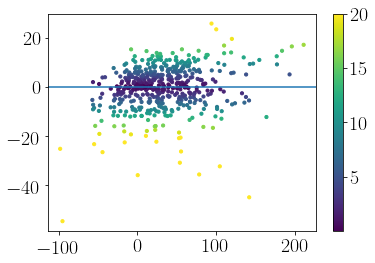

In [68]:
plt.scatter(rdf.vx, rdf.vx-rdf.vx_inferred, c=vxresid, s=10, vmax=20)
plt.axhline()
plt.colorbar()